In [ ]:
!pip3 install ktrain

In [ ]:
!pip install transformers

In [ ]:
!pip install Open-Tamil

In [ ]:
!pip install johnsnowlabs


In [ ]:
!pip install nlp


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import tamil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
import torch
import nlp
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup


https://proceedings.neurips.cc/paper_files/paper/2015/file/afdec7005cc9f14302cd0474fd0f3c96-Paper.pdf

NLP : Language Detection in Python {in தமிழ்}

In [ ]:
!pip install TextBlob

In [25]:
from textblob import TextBlob

In [ ]:
from nltk.corpus import gutenberg
from nltk import FreqDist
# For plotting, we need matplotlib (get it from the NLTK download page)
import matplotlib
import matplotlib.pyplot as plt
# Count each token in each text of the Gutenberg collection
fd = FreqDist()
for text in gutenberg.fileids():
  for word in gutenberg.words(text):
    fd.inc(word)
# Initialize two empty lists which will hold our ranks and frequencies
ranks = []
freqs = []
# Generate a (rank, frequency) point for each counted token and
# and append to the respective lists, Note that the iteration
# over fd is automatically sorted.
for rank, word in enumerate(fd):
  ranks.append(rank+1)
  freqs.append(fd[word])

# Plot rank vs frequency on a log−log plot and show the plot
plt.loglog(ranks, freqs)
plt.xlabel(’frequency(f)’, fontsize=14, fontweight=’bold’)
plt.ylabel(’rank(r)’, fontsize=14, fontweight=’bold’)
plt.grid(True)
plt.show()

In [ ]:
bestwriter=pd.read_csv('puliyurkesikan_bert.csv')
print(bestwriter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   வ.எண்    20 non-null     int64 
 1   பெயர்    20 non-null     object
 2   பணிநிலை  20 non-null     object
 3   வினா 1   20 non-null     object
 4   வினா 2   20 non-null     object
 5   வினா 3   20 non-null     object
 6   வினா 4   20 non-null     object
 7   வினா 5   20 non-null     object
 8   வினா 6   20 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB
None


In [ ]:
bestwriter=pd.read_csv('puliyurkesikan_bert.csv')
bestwriter.head()

,வ.எண்,பெயர்,பணிநிலை,வினா 1,வினா 2,வினா 3,வினா 4,வினா 5,வினா 6
0,1,முனைவர் ம.தமிழரசன்,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
1,2,முனைவர் சே.முனியசாமி,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,பழைய உரை,பழைய உரை,பழைய உரை,ச. திருஞான சம்பந்தம்,பழைய உரை
2,3,நா.உமா மகேஸ்வரி,உதவிப்பேராசிரியர்,புலியூர்க் கேசிகன் உரை,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
3,4,முனைவர் கோ. சுகன்யா,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
4,5,இரா.தியாகு,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,பழைய உரை,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை


In [ ]:
bestwriter=pd.read_csv('puliyurkesikan_bert.csv')
bestwriter.tail()

,வ.எண்,பெயர்,பணிநிலை,வினா 1,வினா 2,வினா 3,வினா 4,வினா 5,வினா 6
15,16,A Eswaran,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,பழைய உரை,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
16,17,Annapoorani. C,முனைவர்பட்ட ஆய்வாளர்,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை
17,18,முனைவர் ந.இராஜேந்திரன்,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
18,19,Dr A.Senthamizhselvi,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
19,20,வா. காருண்யா,உதவிப்பேராசிரியர்,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை


In [ ]:
bestwriter=pd.read_csv('puliyurkesikan_bert.csv')
bestwriter.describe()

,வ.எண்
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


In [ ]:
bestwriter=pd.read_csv('puliyurkesikan_bert.csv')
table=pd.DataFrame(bestwriter)
print(table)

    வ.எண்                        பெயர்               பணிநிலை  \
0       1           முனைவர் ம.தமிழரசன்     உதவிப்பேராசிரியர்   
1       2         முனைவர் சே.முனியசாமி     உதவிப்பேராசிரியர்   
2       3              நா.உமா மகேஸ்வரி     உதவிப்பேராசிரியர்   
3       4          முனைவர் கோ. சுகன்யா     உதவிப்பேராசிரியர்   
4       5                   இரா.தியாகு     உதவிப்பேராசிரியர்   
5       6      முனைவர் ரா.பிரேம்குமார்     உதவிப்பேராசிரியர்   
6       7             முனைவர் ம.மைதிலி     உதவிப்பேராசிரியர்   
7       8  முனைவ‌ர். சீ. பிரேம  குமாரி     உதவிப்பேராசிரியர்   
8       9                மணிமேகலை ப. க     உதவிப்பேராசிரியர்   
9      10         முனைவர் கா. கோகுலன்      உதவிப்பேராசிரியர்   
10     11      முதுமுனைவர் மு.ஐயப்பன்.     உதவிப்பேராசிரியர்   
11     12                 R. Sharmila      உதவிப்பேராசிரியர்   
12     13        முனைவர் அ. முப்பாலிகை     உதவிப்பேராசிரியர்   
13     14       முனைவர் ஞா விஜயகுமாரி      உதவிப்பேராசிரியர்   
14     15   முனைவர் க. சத்தியமூர்த்தி   

In [ ]:
புலியூர்க்கேசிகன்_உரை= pd.read_csv('புலியூர்க்கேசின்_உரைமதிப்பாய்வு.csv')
புலியூர்க்கேசிகன்_உரை.head()

,வ.எண்,பெயர்,பணிநிலை,வினா 1,வினா 2,வினா 3,வினா 4,வினா 5,வினா 6
0,1,முனைவர் ம.தமிழரசன்,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
1,2,முனைவர் சே.முனியசாமி,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,பழைய உரை,பழைய உரை,பழைய உரை,ச. திருஞான சம்பந்தம்,பழைய உரை
2,3,நா.உமா மகேஸ்வரி,உதவிப்பேராசிரியர்,புலியூர்க் கேசிகன் உரை,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
3,4,முனைவர் கோ. சுகன்யா,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
4,5,இரா.தியாகு,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,பழைய உரை,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை


In [ ]:
புலியூர்க்கேசிகன்_உரை.tail()

,வ.எண்,பெயர்,பணிநிலை,வினா 1,வினா 2,வினா 3,வினா 4,வினா 5,வினா 6
15,16,A Eswaran,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,பழைய உரை,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
16,17,Annapoorani. C,முனைவர்பட்ட ஆய்வாளர்,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை
17,18,முனைவர் ந.இராஜேந்திரன்,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
18,19,Dr A.Senthamizhselvi,உதவிப்பேராசிரியர்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,ச. திருஞான சம்பந்தம்,பழைய உரை
19,20,வா. காருண்யா,உதவிப்பேராசிரியர்,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை,பழைய உரை


**NLTK Moddls in English**

In [15]:


# Download Indian corpus
nltk.download('indian')



[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.


True

In [23]:
# Import Indian corpus
from nltk.corpus import indian

# Show words from each text
for text in indian.fileids():
    print(text, indian.words(text)[:5])


bangla.pos ['মহিষের', 'সন্তান', ':', 'তোড়া', 'উপজাতি']
hindi.pos ['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक']
marathi.pos ["''", 'सनातनवाद्यांनी', 'व', 'प्रतिगाम्यांनी', 'समाज']
telugu.pos ['4', '.', 'ఆడిట్', 'నిర్వహణ', 'ఆడిటర్']


In [34]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [35]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [36]:
emma = gutenberg.words('austen-emma.txt')
print(len(emma))
print(emma)

192427
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]


In [37]:
emma_text = nltk.Text(gutenberg.words('austen-emma.txt'))
print(emma_text,len(emma_text))

<Text: Emma by Jane Austen 1816> 192427


**புலியூர்க் கேசிகன்**

முத்தமிழ் நூல் ஆய்வு

In [96]:
முத்தமிழ் = pd.read_csv ("puliyur_muthamizh.csv")
print(முத்தமிழ்)

      பச்ச
0        ச
1        *
2     224.
3     காறை
4        உ
...    ...
9100   ய்‌
9101     இ
9102    2ஐ
9103     ே
9104    நி

[9105 rows x 1 columns]


In [50]:
முத்தமிழ் = pd.read_csv("புலியூர்_முத்தமிழ்.csv")
print(முத்தமிழ்)

             பச்ச ச * 224. 
0                 காறை உ ஆ 
1           மங்ற ரிலாரியீட 
2                      மீட 
3       - முத்தமிழ்‌ மதுரை 
4     புலியூர்க்‌ கேசிகன்‌ 
...                     ...
2917                    353
2918                    512
2919                    நி 
2920                     25
2921                      2

[2922 rows x 1 columns]


In [57]:
 #!/usr/bin/python
 # -*- coding: utf-8 -*-
முத்தமிழ் = pd.read_csv("புலியூர்_முத்தமிழ்.csv")
முத்தமிழ்_ஆய்வு = nltk.Text(முத்தமிழ்)
print(முத்தமிழ்_ஆய்வு,len(முத்தமிழ்_ஆய்வு))

<Text: பச்ச ச * 224. ...> 1


In [95]:
import csv

முத்தமிழ்பிரி = முத்தமிழ்.split()


AttributeError: ignored

In [72]:
def முத்தமிழ்(x): return -3*x**2 + 2*x + 20


In [71]:
def plot_function(முத்தமிழ், min=-2.1, max=2.1, color='r'):
    x = np.linspace(min,max, 100)[:,None]
    plt.plot(x, முத்தமிழ்(x), color)
    print(plt.plot)

<function plot at 0x7e70b143b400>


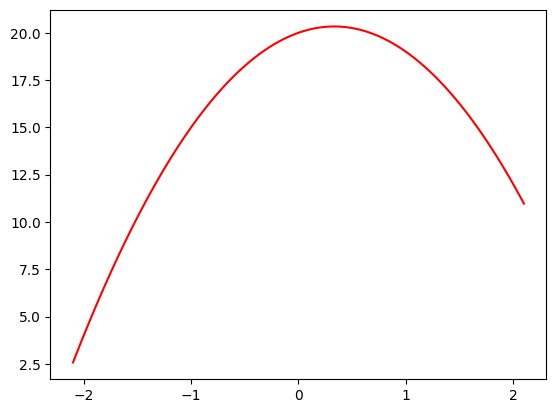

In [73]:
plot_function(முத்தமிழ்)

In [78]:
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [ ]:
x = np.linspace(-2, 2, num=20)[:,None]
y = add_noise(முத்தமிழ்(x), 0.2, 1.3)
plt.scatter(x,y);

In [70]:


eval_df = pd.read_csv('புலியூர்_முத்தமிழ்.csv')
eval_df.describe()



,பச்ச ச * 224.
count,2922
unique,2896
top,2
freq,4


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 2986 (\N{TAMIL LETTER PA}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 2970 (\N{TAMIL LETTER CA}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.
  plt.savefig(


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['பச்ச ச * 224. '], **{})
chart

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [82]:
def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    plt.scatter(x,y)
    plot_function(model.predict)

In [ ]:
plot_poly(1)

In [48]:
import tamil

print(len(முத்தமிழ்))

704
